In [2051]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2052]:
data = pd.read_csv('../houseprice.csv')

print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2053]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2054]:
def isMixed(s):
    d=l=0
    for c in str(s):
        if c.isdigit():
            d=d+1
        elif c.isalpha():
            l=l+1
        else:
            continue
    if (d>0) and (l>0):
        return True
    else:
        return False
    
def fiveTypes(data):
    categories = list(data.select_dtypes(include =['object','bool']).columns)
    numbers  = list(data.select_dtypes(include=['int64','float64']).columns)
    year_features =[i for i in numbers if all(np.isin(data[i].dropna().unique(),np.arange(1500,2099)))]
    discrete = [i for i in numbers if data[i].nunique() <20 and i not in year_features]
    continous = [i for i in numbers if i not in(discrete) and i not in year_features]
    mixed = []
    for i in categories:
        if data[i].dropna().apply(isMixed).any():
            mixed.append(i)
    return categories,numbers,discrete,continous,year_features, mixed



In [2055]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(
    ['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

# Drop Large Missing Categories

In [2056]:
categories,numbers,discrete,continous,year_features, mixed = fiveTypes(X_train)
data[categories].isnull().mean().sort_values()

MSZoning         0.000000
PavedDrive       0.000000
Functional       0.000000
KitchenQual      0.000000
CentralAir       0.000000
HeatingQC        0.000000
Heating          0.000000
SaleType         0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
SaleCondition    0.000000
HouseStyle       0.000000
Street           0.000000
LotShape         0.000000
RoofStyle        0.000000
Utilities        0.000000
LotConfig        0.000000
LandContour      0.000000
BldgType         0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000685
MasVnrType       0.005479
BsmtCond         0.025342
BsmtQual         0.025342
BsmtFinType1     0.025342
BsmtExposure     0.026027
BsmtFinType2     0.026027
GarageType       0.055479
GarageFinish     0.055479
GarageQual       0.055479
GarageCond       0.055479
FireplaceQu 

In [2057]:
X_train.drop(['Alley','MiscFeature','PoolQC'],axis=1,inplace=True)
X_test.drop(['Alley','MiscFeature','PoolQC'],axis=1,inplace=True)

In [2058]:
categories,numbers,discrete,continous,year_features, mixed =fiveTypes(X_train)

In [2059]:
numbers

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [2060]:
disc = discrete

In [2061]:
year_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [2062]:
from feature_engine.creation import CombineWithReferenceFeature

cwfr = CombineWithReferenceFeature(variables_to_combine=['YrSold'],
                                   reference_variables=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'],
                                   operations= ['sub'])

cwfr.fit(X_train)

X_train= cwfr.transform(X_train)
X_test= cwfr.transform(X_test)

In [2063]:
from feature_engine.selection import DropFeatures
df = DropFeatures(['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold'])

df.fit(X_train)

X_train = df.transform(X_train)
X_test = df.transform(X_test)

In [2064]:
categories,numbers,discrete,continous,year_features, mixed =fiveTypes(X_train)

In [2065]:
numbers

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold_sub_YearBuilt',
 'YrSold_sub_YearRemodAdd',
 'YrSold_sub_GarageYrBlt']

In [2066]:
catFewNulls = [i for i in categories if X_train[i].isnull().mean()> 0 and X_train[i].isnull().mean() <0.05]

In [2067]:
catFewNulls

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical']

In [2068]:
catLargeNulls = [i for i in categories if X_train[i].isnull().mean()>= 0.05]

In [2069]:
catLargeNulls

['FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'Fence']

In [2070]:
numbers

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold_sub_YearBuilt',
 'YrSold_sub_YearRemodAdd',
 'YrSold_sub_GarageYrBlt']

In [2071]:
NumFewNulls = [i for i in numbers if X_train[i].isnull().mean()> 0 and X_train[i].isnull().mean() <0.05]

In [2072]:
NumFewNulls

['MasVnrArea']

In [2073]:
NumLargeNulls = [i for i in numbers if X_train[i].isnull().mean()>= 0.05]

In [2074]:
NumLargeNulls

['LotFrontage', 'YrSold_sub_GarageYrBlt']

# Numerical Imputation

In [2075]:
from feature_engine.imputation import MeanMedianImputer,AddMissingIndicator

In [2076]:
imputer = MeanMedianImputer(variables=NumFewNulls+NumLargeNulls)

In [2077]:
imputer.fit (X_train)

MeanMedianImputer(variables=['MasVnrArea', 'LotFrontage',
                             'YrSold_sub_GarageYrBlt'])

In [2078]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [2079]:
mi = AddMissingIndicator(variables=NumLargeNulls)
mi.fit(X_train)

AddMissingIndicator(variables=['LotFrontage', 'YrSold_sub_GarageYrBlt'])

In [2080]:
X_train = mi.transform(X_train)
X_test = mi.transform(X_test)

# Categorical Imputation

In [2081]:
from feature_engine.imputation import CategoricalImputer

In [2082]:
imputer = CategoricalImputer(imputation_method = 'missing',variables=catLargeNulls,return_object=True)

In [2083]:
imputer.fit(X_train)

CategoricalImputer(return_object=True,
                   variables=['FireplaceQu', 'GarageType', 'GarageFinish',
                              'GarageQual', 'GarageCond', 'Fence'])

In [2084]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [2085]:
imputer = CategoricalImputer(imputation_method = 'frequent',variables=catFewNulls,return_object=True)

In [2086]:
imputer.fit(X_train)

CategoricalImputer(imputation_method='frequent', return_object=True,
                   variables=['MasVnrType', 'BsmtQual', 'BsmtCond',
                              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                              'Electrical'])

In [2087]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [2088]:
X_train.isnull().mean().sort_values()

MSSubClass                0.0
FireplaceQu               0.0
Fireplaces                0.0
Functional                0.0
TotRmsAbvGrd              0.0
                         ... 
MasVnrArea                0.0
MasVnrType                0.0
Exterior2nd               0.0
RoofMatl                  0.0
YrSold_sub_GarageYrBlt    0.0
Length: 75, dtype: float64

# Rare Label Encoding

In [2089]:
discrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MoSold']

In [2090]:
X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')
categories = categories+discrete

In [2091]:
from feature_engine.encoding import RareLabelEncoder

In [2092]:
rareEncoder = RareLabelEncoder(tol= 0.05,n_categories=1,variables=categories)

In [2093]:
rareEncoder.fit(X_train)

RareLabelEncoder(n_categories=1,
                 variables=['MSZoning', 'Street', 'LotShape', 'LandContour',
                            'Utilities', 'LotConfig', 'LandSlope',
                            'Neighborhood', 'Condition1', 'Condition2',
                            'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
                            'Exterior1st', 'Exterior2nd', 'MasVnrType',
                            'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                            'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                            'BsmtFinType2', 'Heating', 'HeatingQC',
                            'CentralAir', 'Electrical', 'KitchenQual', ...])

In [2094]:
X_train = rareEncoder.transform(X_train)

In [2095]:
X_test = rareEncoder.transform(X_test)

In [2096]:
for i in categories:
    print(i,X_train[i].unique())

MSZoning ['RL' 'RM' 'Rare']
Street ['Pave' 'Rare']
LotShape ['Reg' 'IR1' 'Rare']
LandContour ['Lvl' 'Rare']
Utilities ['AllPub' 'Rare']
LotConfig ['Inside' 'Corner' 'CulDSac' 'Rare']
LandSlope ['Gtl' 'Rare']
Neighborhood ['CollgCr' 'Rare' 'Edwards' 'Sawyer' 'NAmes' 'Gilbert' 'Somerst' 'OldTown']
Condition1 ['Norm' 'Rare']
Condition2 ['Norm' 'Rare']
BldgType ['1Fam' 'TwnhsE' 'Rare']
HouseStyle ['2Story' '1Story' '1.5Fin' 'Rare']
RoofStyle ['Gable' 'Hip' 'Rare']
RoofMatl ['CompShg' 'Rare']
Exterior1st ['VinylSd' 'Wd Sdng' 'Rare' 'HdBoard' 'MetalSd' 'Plywood']
Exterior2nd ['VinylSd' 'Wd Sdng' 'Plywood' 'Rare' 'HdBoard' 'MetalSd']
MasVnrType ['BrkFace' 'None' 'Stone' 'Rare']
ExterQual ['TA' 'Gd' 'Rare']
ExterCond ['TA' 'Gd' 'Rare']
Foundation ['PConc' 'CBlock' 'BrkTil' 'Rare']
BsmtQual ['Gd' 'TA' 'Rare' 'Ex']
BsmtCond ['TA' 'Rare']
BsmtExposure ['No' 'Mn' 'Gd' 'Av']
BsmtFinType1 ['GLQ' 'BLQ' 'Rec' 'ALQ' 'Unf' 'Rare']
BsmtFinType2 ['Unf' 'Rare']
Heating ['GasA' 'Rare']
HeatingQC ['Ex' 'Gd' 

In [2097]:
X_train[categories].nunique().sort_values()

CentralAir       2
PoolArea         2
BsmtCond         2
Functional       2
LowQualFinSF     2
RoofMatl         2
BsmtFinType2     2
Condition2       2
Heating          2
Street           2
LandSlope        2
KitchenAbvGr     2
Utilities        2
3SsnPorch        2
LandContour      2
Condition1       2
HalfBath         3
Electrical       3
GarageQual       3
PavedDrive       3
Fence            3
SaleType         3
BsmtHalfBath     3
FullBath         3
GarageCond       3
BsmtFullBath     3
MSZoning         3
LotShape         3
BldgType         3
RoofStyle        3
ExterCond        3
ExterQual        3
Fireplaces       4
HouseStyle       4
HeatingQC        4
SaleCondition    4
BedroomAbvGr     4
LotConfig        4
Foundation       4
GarageFinish     4
FireplaceQu      4
BsmtQual         4
KitchenQual      4
BsmtExposure     4
MasVnrType       4
MSSubClass       5
GarageType       5
OverallCond      5
GarageCars       5
BsmtFinType1     6
OverallQual      6
Exterior1st      6
Exterior2nd 

In [2098]:
categories,numbers,discrete,continous,year_features,mixed =fiveTypes(X_train)

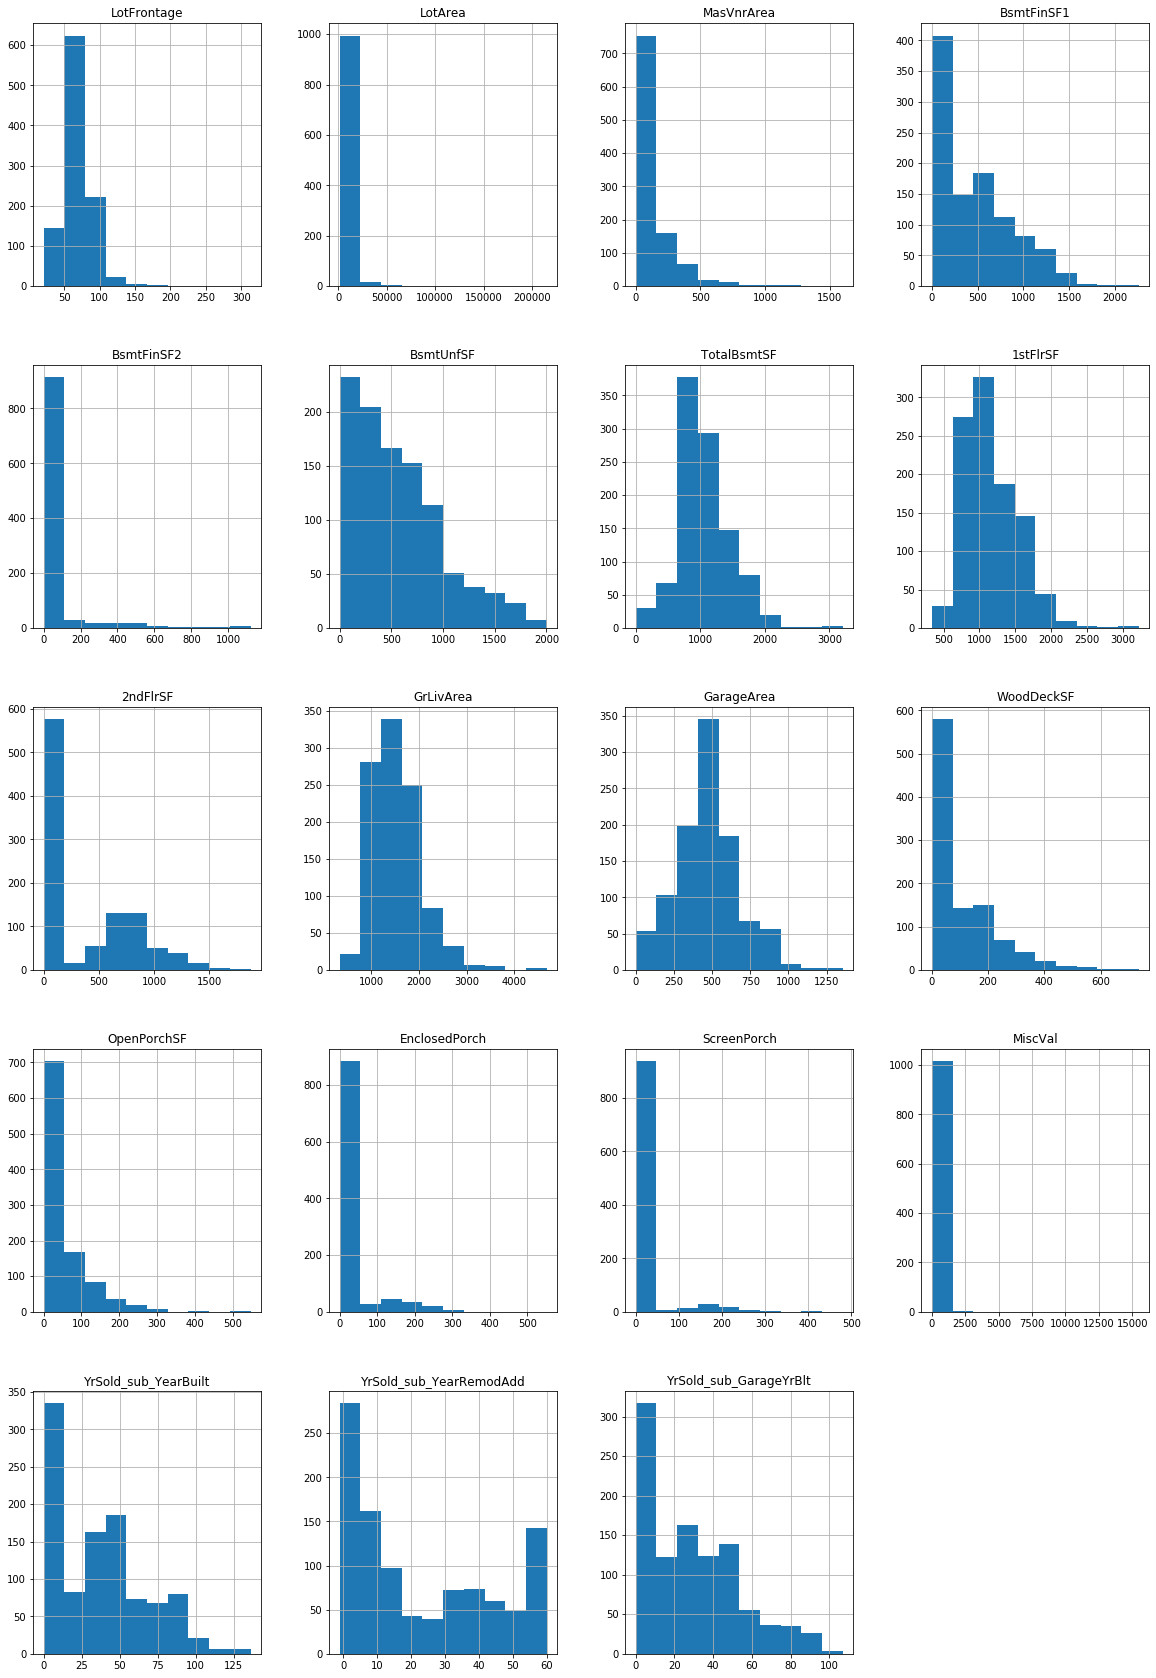

In [2099]:
X_train[continous].hist(figsize=(20,30))
plt.show()

# Discretisation

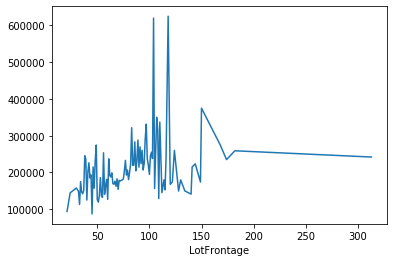

In [2100]:
pd.concat([X_train, y_train], axis=1).groupby(['LotFrontage'])['SalePrice'].mean().plot()

In [2102]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [2103]:
discret = EqualFrequencyDiscretiser(6,variables=continous, return_object=True)

In [2104]:
discret.fit(X_train)

EqualFrequencyDiscretiser(q=6,
                          variables=['LotFrontage', 'LotArea', 'MasVnrArea',
                                     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                                     'GrLivArea', 'GarageArea', 'WoodDeckSF',
                                     'OpenPorchSF', 'EnclosedPorch',
                                     'ScreenPorch', 'MiscVal',
                                     'YrSold_sub_YearBuilt',
                                     'YrSold_sub_YearRemodAdd',
                                     'YrSold_sub_GarageYrBlt'])

In [2105]:
X_train = discret.transform(X_train)
X_test = discret.transform(X_test)

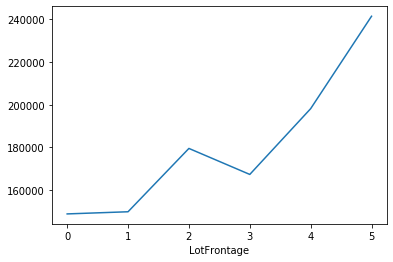

In [1918]:
pd.concat([X_train,y_train],axis=1).groupby('LotFrontage')['SalePrice'].mean().plot()

# Target Encoding

In [1919]:
from feature_engine.encoding import OrdinalEncoder

In [1920]:
categories = list(X_train.select_dtypes(include =['object','bool']).columns)

In [1921]:
categories

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 

In [1922]:
oe = OrdinalEncoder(variables=categories)

In [1923]:
oe.fit(X_train,y_train)

OrdinalEncoder(variables=['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
                          'Street', 'LotShape', 'LandContour', 'Utilities',
                          'LotConfig', 'LandSlope', 'Neighborhood',
                          'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                          'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
                          'Exterior1st', 'Exterior2nd', 'MasVnrType',
                          'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
                          'BsmtQual', 'BsmtCond', 'BsmtExposure',
                          'BsmtFinType1', ...])

In [1924]:
oe.encoder_dict_

{'MSSubClass': {'Rare': 0, 50: 1, 20: 2, 120: 3, 60: 4},
 'MSZoning': {'RM': 0, 'Rare': 1, 'RL': 2},
 'LotFrontage': {0: 0, 1: 1, 3: 2, 2: 3, 4: 4, 5: 5},
 'LotArea': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5},
 'Street': {'Rare': 0, 'Pave': 1},
 'LotShape': {'Reg': 0, 'IR1': 1, 'Rare': 2},
 'LandContour': {'Lvl': 0, 'Rare': 1},
 'Utilities': {'Rare': 0, 'AllPub': 1},
 'LotConfig': {'Inside': 0, 'Rare': 1, 'Corner': 2, 'CulDSac': 3},
 'LandSlope': {'Gtl': 0, 'Rare': 1},
 'Neighborhood': {'Edwards': 0,
  'OldTown': 1,
  'Sawyer': 2,
  'NAmes': 3,
  'Gilbert': 4,
  'Rare': 5,
  'CollgCr': 6,
  'Somerst': 7},
 'Condition1': {'Rare': 0, 'Norm': 1},
 'Condition2': {'Rare': 0, 'Norm': 1},
 'BldgType': {'Rare': 0, 'TwnhsE': 1, '1Fam': 2},
 'HouseStyle': {'1.5Fin': 0, 'Rare': 1, '1Story': 2, '2Story': 3},
 'OverallQual': {4: 0, 5: 1, 6: 2, 7: 3, 8: 4, 'Rare': 5},
 'OverallCond': {'Rare': 0, 6: 1, 7: 2, 8: 3, 5: 4},
 'RoofStyle': {'Gable': 0, 'Rare': 1, 'Hip': 2},
 'RoofMatl': {'CompShg': 0, 'Rare': 

In [1925]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

In [1926]:
X_test[disc].isnull().any()

MSSubClass      False
OverallQual     False
OverallCond     False
LowQualFinSF    False
BsmtFullBath    False
BsmtHalfBath    False
FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
TotRmsAbvGrd    False
Fireplaces      False
GarageCars      False
3SsnPorch       False
PoolArea        False
MoSold          False
dtype: bool

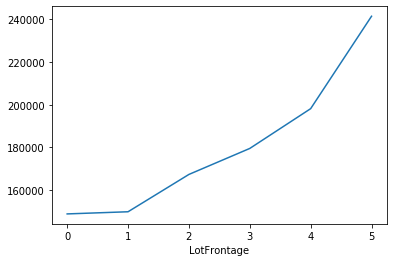

In [1927]:
pd.concat([X_train,y_train],axis=1).groupby('LotFrontage')['SalePrice'].mean().plot()

# Scaling

In [1928]:
from sklearn.preprocessing import StandardScaler

In [1929]:
scaler = StandardScaler()
train = scaler.fit_transform(X_train)
test = scaler.transform(X_test)
X_train = pd.DataFrame(data=train,columns=X_train.columns)
X_test = pd.DataFrame(data=test,columns=X_test.columns)

In [1930]:
X_test.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleType,SaleCondition,YrSold_sub_YearBuilt,YrSold_sub_YearRemodAdd,YrSold_sub_GarageYrBlt
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,4.380000e+02,438.000000,438.000000,...,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,-0.050060,-0.110075,-0.033608,-0.031497,0.037396,-0.028133,0.058443,3.129588e-02,0.010784,-0.074922,...,0.0,0.114547,-0.075130,0.0,0.037427,0.006560,0.020745,0.044146,0.048640,0.051976
std,0.993952,1.085792,0.994867,1.028770,0.684807,1.003372,1.076355,2.153517e-16,0.988614,0.845417,...,0.0,1.760355,1.091967,0.0,0.965973,1.128501,1.022981,1.015894,1.046278,1.007414
min,-1.298140,-2.347498,-1.501941,-1.462623,-14.261837,-0.729706,-0.327504,3.129588e-02,-0.586249,-0.249740,...,0.0,-0.054259,-2.704670,0.0,-1.710462,-2.971576,-3.129248,-1.470474,-1.470727,-1.511289
25%,-1.298140,0.476684,-0.909740,-0.877345,0.070117,-0.729706,-0.327504,3.129588e-02,-0.586249,-0.249740,...,0.0,-0.054259,0.450778,0.0,-0.872852,-0.098397,0.132446,-0.889560,-0.881283,-0.927563
50%,0.103549,0.476684,0.274660,-0.292067,0.070117,-0.729706,-0.327504,3.129588e-02,-0.586249,-0.249740,...,0.0,-0.054259,0.450778,0.0,-0.035242,-0.098397,0.132446,0.272268,0.297606,0.239887
75%,0.804394,0.476684,0.866861,0.878490,0.070117,1.067305,-0.327504,3.129588e-02,0.415668,-0.249740,...,0.0,-0.054259,0.450778,0.0,0.802368,-0.098397,0.132446,0.853182,0.887050,0.823612
max,1.505239,0.476684,1.459061,1.463769,0.070117,2.864316,3.053397,3.129588e-02,2.419501,4.004164,...,0.0,18.430048,0.450778,0.0,1.639978,2.774783,1.763294,1.434096,1.476495,1.407338


In [1931]:
from sklearn.linear_model import Lasso

In [1932]:
model = Lasso(random_state = 0)

In [1933]:
model.fit(X_train,y_train)

Lasso(random_state=0)

In [1934]:
X_test[disc].isnull().any()

MSSubClass      False
OverallQual     False
OverallCond     False
LowQualFinSF    False
BsmtFullBath    False
BsmtHalfBath    False
FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
TotRmsAbvGrd    False
Fireplaces      False
GarageCars      False
3SsnPorch       False
PoolArea        False
MoSold          False
dtype: bool

In [1935]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [1936]:
from sklearn.metrics import r2_score

In [1937]:
r2_score(y_train,train_predict)

0.8432093807675229

In [1938]:
r2_score(y_test,test_predict)

0.7627943054893358

In [1939]:
model.coef_

array([ 4.17533225e+02,  6.62476258e+02,  4.19974505e+01,  5.80360488e+03,
        3.39240053e+03,  2.26249598e+03, -9.76890594e+02,  1.26125905e+03,
        1.55396700e+03, -5.50797432e+01,  1.99473887e+03,  3.54881217e+03,
        4.12311493e+03, -7.83444374e+02, -2.00456857e+03,  9.96771799e+03,
       -8.01924520e+02,  4.52249768e+03,  2.74839363e+03,  3.77017910e+03,
       -4.65319940e+03, -9.55062577e+02,  3.48269761e+03,  6.85423644e+03,
        3.46724960e+02, -1.79599697e+02,  9.10405586e+03,  1.86853005e+03,
        4.70885372e+03,  1.61751950e+03,  1.44032966e+03, -5.32979364e+02,
        0.00000000e+00,  1.96328280e+03,  6.00029189e+03,  3.38842765e+02,
        3.42168906e+02,  3.17854480e+03,  2.93903516e+02,  8.05813918e+03,
        7.87710159e+03, -1.03366883e+02,  5.29648966e+03,  4.66974158e+03,
       -1.86746221e+03,  5.34229865e+03,  4.34385668e+03,  3.00123622e+02,
        5.58446658e+03,  7.64850358e+03,  5.70720694e+03,  6.51113296e+03,
        4.70916733e+03, -

In [1940]:
tmp =pd.Series(data=np.abs(model.coef_),index=X_train.columns)

In [1941]:
tmp.sort_values(ascending=False, inplace=True)

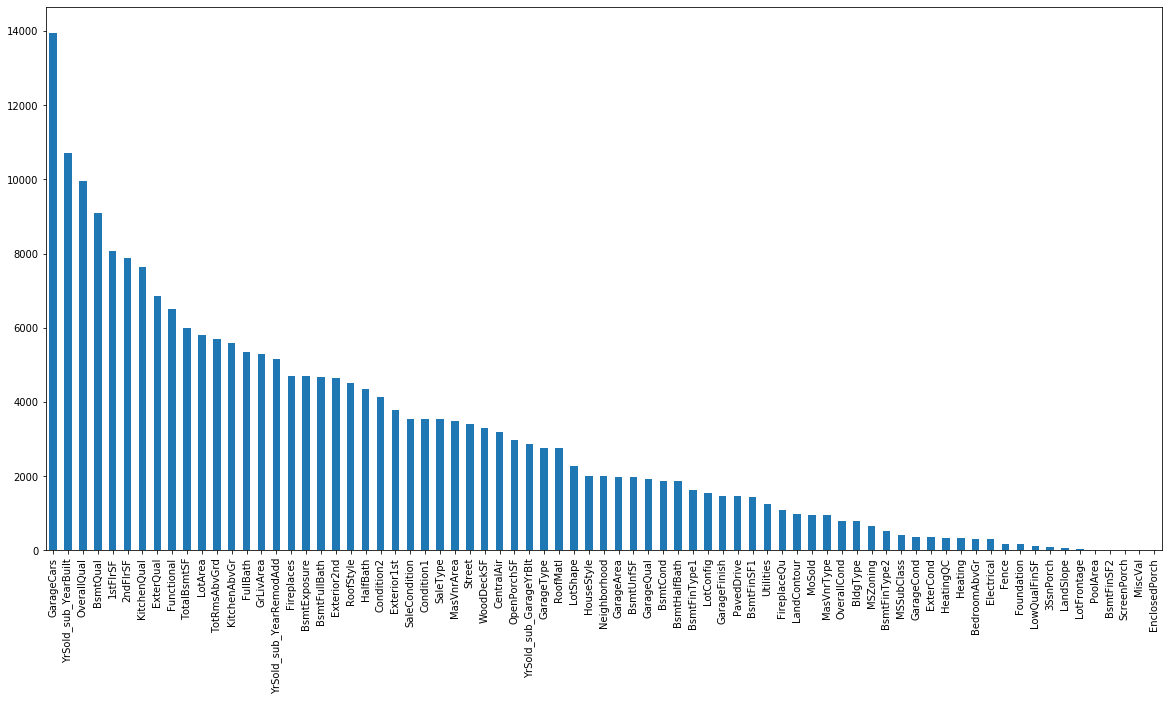

In [1942]:
plt.figure(figsize=(20,10))
tmp.plot.bar()

In [1943]:
from feature_engine.selection import SelectBySingleFeaturePerformance

In [1944]:
sel = SelectBySingleFeaturePerformance(estimator=Lasso(random_state=0),scoring='r2',cv=10)

In [1945]:
sel.fit(X_train,y_train)

SelectBySingleFeaturePerformance(cv=10, estimator=Lasso(random_state=0),
                                 scoring='r2',
                                 variables=['MSSubClass', 'MSZoning',
                                            'LotFrontage', 'LotArea', 'Street',
                                            'LotShape', 'LandContour',
                                            'Utilities', 'LotConfig',
                                            'LandSlope', 'Neighborhood',
                                            'Condition1', 'Condition2',
                                            'BldgType', 'HouseStyle',
                                            'OverallQual', 'OverallCond',
                                            'RoofStyle', 'RoofMatl',
                                            'Exterior1st', 'Exterior2nd',
                                            'MasVnrType', 'MasVnrArea',
                                            'ExterQual', 'ExterCond',
               

In [1946]:
sel.features_to_drop_

['MSZoning',
 'LotFrontage',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior2nd',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscVal',
 'MoSold',
 'SaleType',
 'SaleCondition']

In [1947]:
train = X_train.drop(sel.features_to_drop_,axis=1)

In [1948]:
test = X_test.drop(sel.features_to_drop_,axis=1)

In [1949]:
model = Lasso(random_state = 0)

model.fit(train,y_train)

train_predict = model.predict(train)
test_predict = model.predict(test)

from sklearn.metrics import r2_score

r2_score(y_train,train_predict)



0.8014643826517047

In [1950]:
r2_score(y_test,test_predict)

0.763029535281903

In [1951]:
from sklearn.model_selection import GridSearchCV
alphas = np.logspace(-4, -0.5, 30)
alphas=np.arange(1,5,0.1)
tuned_parameters = [{'alpha': alphas}]

In [1952]:
grid = GridSearchCV(Lasso(),tuned_parameters,cv=5,scoring='r2')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])}],
             scoring='r2')

In [1953]:
grid.best_estimator_

Lasso(alpha=4.900000000000004)

In [1954]:
grid.best_score_

0.8011171844007066

In [1955]:
grid.score(X_test,y_test)

0.7629164806399994

In [1956]:
from sklearn.ensemble import AdaBoostRegressor

In [1957]:
model = AdaBoostRegressor()

In [1958]:
model.fit(X_train,y_train)

AdaBoostRegressor()

In [1959]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [1960]:
r2_score(y_train,train_predict)

0.872475949543658

In [1961]:
r2_score(y_test,test_predict)

0.8118657584336357

In [1962]:
from sklearn.svm import SVR

In [1963]:
model = SVR(kernel='linear',gamma='scale',C=100)

In [1964]:
model.fit(X_train,y_train)
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [1965]:
r2_score(y_train,train_predict)

0.7970310133311324

In [1966]:
r2_score(y_test,test_predict)

0.7467291594299337

In [1967]:
from sklearn.model_selection import GridSearchCV

In [1968]:
grid = GridSearchCV(SVR(kernel='linear'),param_grid={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        },cv=5, scoring='r2')

In [1969]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]},
             scoring='r2')

In [1970]:
grid.best_score_

0.7946657375642554

In [1971]:
grid.best_estimator_

SVR(C=1000, gamma=0.0001, kernel='linear')

In [1972]:
grid.score(X_test,y_test)

0.7609631068122141

In [1973]:
from sklearn.linear_model import Ridge

In [1974]:
model = Ridge()

In [1975]:
model.fit(X_train,y_train)

Ridge()

In [1976]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [1977]:
r2_score(y_train,train_predict)

0.8432088156734401

In [1978]:
r2_score(y_test,test_predict)

0.7628741423311284

In [1979]:
from sklearn.model_selection import cross_val_score

In [1980]:
scores=cross_val_score(Lasso(random_state = 0),X_train,y_train,cv=4,scoring='r2')

In [1981]:
np.mean(scores)

0.8000748896252592

In [1982]:
scores

array([0.75980481, 0.83670295, 0.78142765, 0.82236415])